In [156]:
# Data set and processing
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Model
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB


# Model performance
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
from sklearn.metrics import roc_auc_score
from sklearn import metrics



# Data Import

In [34]:
# Import data
df = pd.read_csv("/Users/johannesschmidt/Credit-Risk-Model/Credit-Risk-Model/credit_risk_dataset.csv")

## EDA

In [28]:
df.info()
df.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   person_age                  32581 non-null  int64   
 1   person_income               32581 non-null  int64   
 2   person_home_ownership       32581 non-null  category
 3   person_emp_length           31686 non-null  float64 
 4   loan_intent                 32581 non-null  category
 5   loan_grade                  32581 non-null  category
 6   loan_amnt                   32581 non-null  int64   
 7   loan_int_rate               29465 non-null  float64 
 8   loan_status                 32581 non-null  int64   
 9   loan_percent_income         32581 non-null  float64 
 10  cb_person_default_on_file   32581 non-null  category
 11  cb_person_cred_hist_length  32581 non-null  int64   
dtypes: category(4), float64(3), int64(5)
memory usage: 2.1 MB


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3


In [20]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


# Data Preprocessing

## Data Type Conversion 

In [35]:
# Convert 'person_home_ownership' to a categorical variable
df['person_home_ownership'] = df['person_home_ownership'].astype('category')

# Convert 'loan_intent' to a categorical variable
df['loan_intent'] = df['loan_intent'].astype('category')

# Convert 'loan_grade' to a categorical variable
df['loan_grade'] = df['loan_grade'].astype('category')

# Convert 'cb_person_default_on_file' to a categorical variable
df['cb_person_default_on_file'] = df['cb_person_default_on_file'].astype('category')

## Clean missing values

In [25]:
df['loan_int_rate'].isnull().value_counts()

loan_int_rate
False    29465
True      3116
Name: count, dtype: int64

In [31]:
df['person_emp_length'].isnull().value_counts()

person_emp_length
False    28638
True       827
Name: count, dtype: int64

In [46]:
filter_condition = df['loan_int_rate'].notnull() & df['person_emp_length'].notnull()

df = df[filter_condition]

In [47]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

## One hot encode categorical features

In [77]:
# One-hot encode categorical variables
df = pd.get_dummies(df, columns=['person_home_ownership', 'loan_intent','loan_grade','cb_person_default_on_file'])

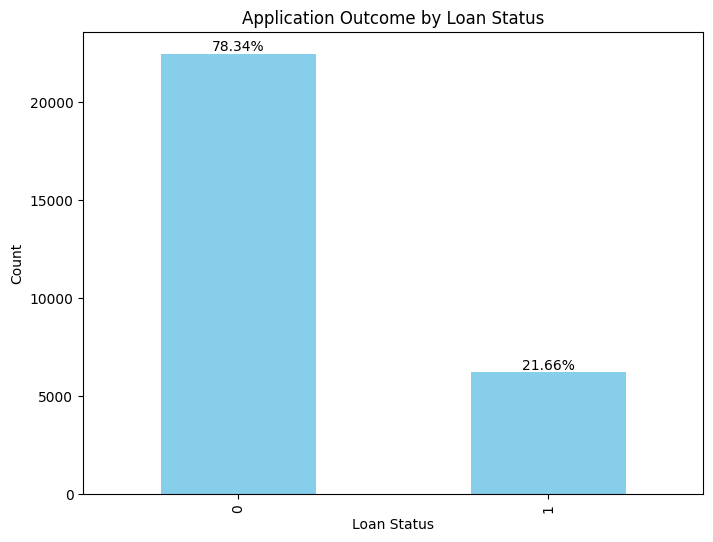

In [78]:
# Count the occurrences of each unique 'loan_status' value
status_counts = df['loan_status'].value_counts()

# Calculate the percentages
status_percentages = (status_counts / status_counts.sum()) * 100

# Create a bar plot
plt.figure(figsize=(8, 6))
ax = status_counts.plot(kind='bar', color='skyblue')
plt.title('Application Outcome by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')

# Annotate the bars with percentages
for i, v in enumerate(status_percentages):
    ax.text(i, status_counts[i], f'{v:.2f}%', ha='center', va='bottom')

# Display the plot
plt.show()

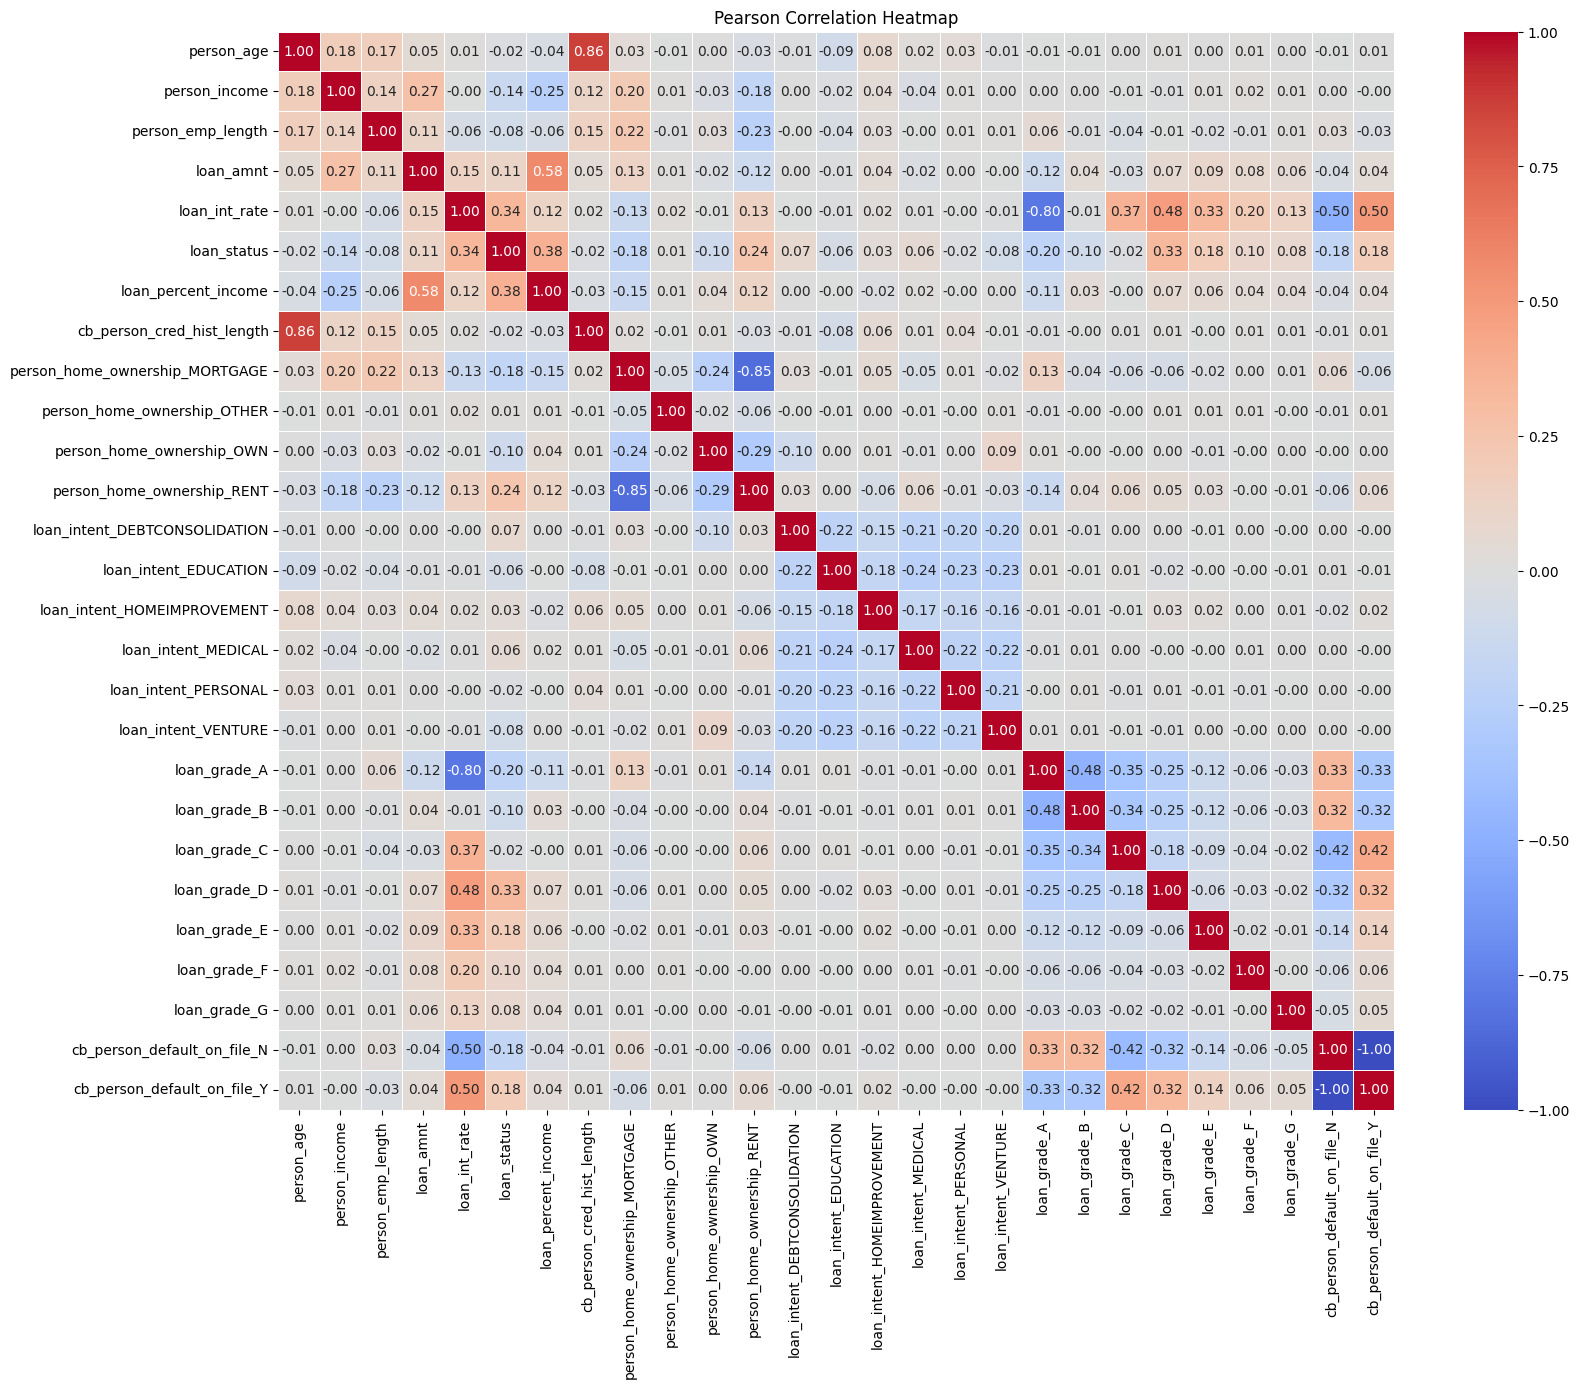

In [85]:
# Calculate the Pearson correlation
correlation_table = df.corr()

# Create a heatmap
plt.figure(figsize=(18, 14))
sns.heatmap(correlation_table, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Set the plot title
plt.title("Pearson Correlation Heatmap")

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


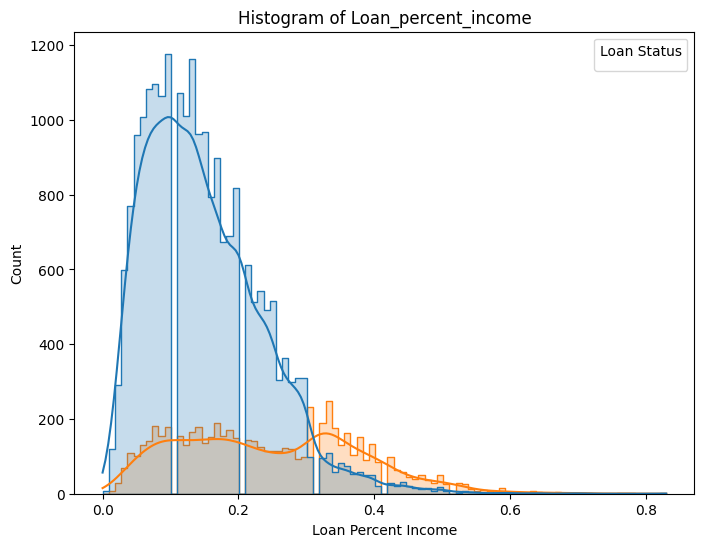

In [86]:
# Create a histogram for 'loan_percent_income'
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='loan_percent_income', kde=True, hue='loan_status', element='step')
plt.title('Histogram of Loan_percent_income')
plt.xlabel('Loan Percent Income')
plt.ylabel('Count')
plt.legend(title='Loan Status', loc='upper right')

# Show the histogram
plt.show()

# Train/Test Split

In [87]:
# Define your features (X) and target variable (y)
X = df.drop(columns=['loan_status'])  # Features
y = df['loan_status']  # Target variable

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (22910, 26)
X_test shape: (5728, 26)
y_train shape: (22910,)
y_test shape: (5728,)


# Modeling

In [88]:
# Stratified cross validation to avoid overfitting
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

## TREE BASED MODELS

In [97]:
# 1) Decision Tree
decision_tree = DecisionTreeClassifier()


# 2) Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=100)

# 3) XG Boost
xgboost = xgb.XGBClassifier()

## LINEAR MODELS

In [98]:
# 4) Logistic Regression
logistic_regression = LogisticRegression(solver='lbfgs',max_iter=5000)


# 5) SVM Regression
svm_classifier = SVC(gamma='auto')


# 6) KNN
knn_classifier = KNeighborsClassifier()

## Probablistic Models

In [102]:
# 7) Naive Bayes
naive_bayes_classifier = GaussianNB()

## NEURAL NETS

In [99]:
# 8) MLP
neural_net_classifier = MLPClassifier(alpha=1)

In [ ]:
# Predict and measure performance scores

# 1) Decision Tree
tree_scores = cross_val_score(decision_tree, X_train, y_train, cv=kfold)
tree_mean = tree_scores.mean()

# 2) Random Forest Classifier
random_forest_scores = cross_val_score(random_forest, X_train, y_train, cv=kfold)
random_forest_mean = random_forest_scores.mean()

# 3) XG Boost
xgboost_scores = cross_val_score(xgboost, X_train, y_train, cv=kfold)
xgboost_mean = xgboost_scores.mean()

# 4) Logistic Regression
logisitic_scores = cross_val_score(logistic_regression, X_train, y_train, cv=kfold)
logisitic_mean = logisitic_scores.mean()


# 5) SVM Regression
svm_scores = cross_val_score(svm_classifier, X_train, y_train, cv=kfold)
svm_mean = svm_scores.mean()


# 6) KNN
knn_scores = cross_val_score(knn_classifier, X_train, y_train, cv=kfold)
knn_mean = knn_scores.mean()

# 7) Naive Bayes
nb_scores = cross_val_score(naive_bayes_classifier, X_train, y_train, cv=kfold)
nb_mean = nb_scores.mean()

# 7) MLP
neural_net_scores = cross_val_score(neural_net_classifier, X_train, y_train, cv=kfold)
neural_net_mean = neural_net_scores.mean()

In [104]:
data = {'Classifiers': ['Decision Tree','Random Forest','XGBoost','Logistic Regression','SVM','KNN','Naive Bayes','Neural Net'],
        'Crossval Mean Scores': [tree_mean,random_forest_mean,xgboost_mean,logisitic_mean,svm_mean,knn_mean,nb_mean,neural_net_mean]}

result_df = pd.DataFrame(data)
result_df.sort_values(by=['Crossval Mean Scores'],ascending=False,inplace=True)
result_df

,Classifiers,Crossval Mean Scores
2,XGBoost,0.934395
1,Random Forest,0.933086
0,Decision Tree,0.888957
5,KNN,0.831471
6,Naive Bayes,0.817678
3,Logistic Regression,0.816674
7,Neural Net,0.815190
4,SVM,0.811392


# Feature importance

/Users/johannesschmidt/Credit-Risk-Model/Credit-Risk-Model/.conda/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/johannesschmidt/Credit-Risk-Model/Credit-Risk-Model/.conda/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/johannesschmidt/Credit-Risk-Model/Credit-Risk-Model/.conda/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/johannesschmidt/Credit-Risk-Model/Credit-Risk-Model/.conda/lib/python3.10/site-packages/xgboost/data.py:359: Fu

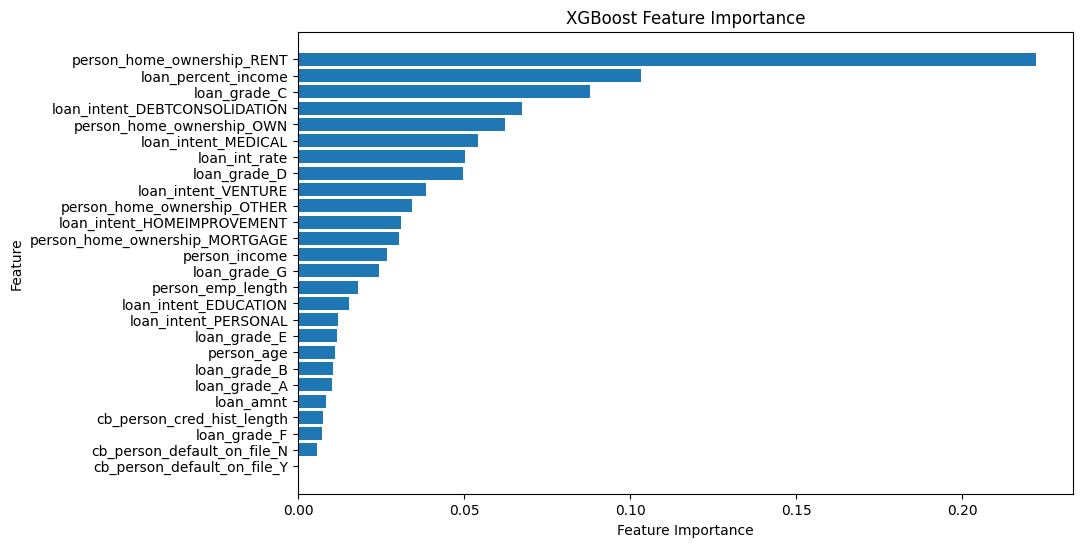

In [109]:
xgboost_model = xgboost.fit(X_train,y_train)

# Get feature importances from the trained XGBoost model
feature_importances = xgboost_model.feature_importances_

# Get the names of the features
feature_names = X_train.columns

# Create a DataFrame to store the feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the features by importance in descending order
feature_importance_df.sort_values(by='Importance', ascending=True,inplace=True)

# Create a horizontal bar plot to visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('XGBoost Feature Importance')
plt.show()

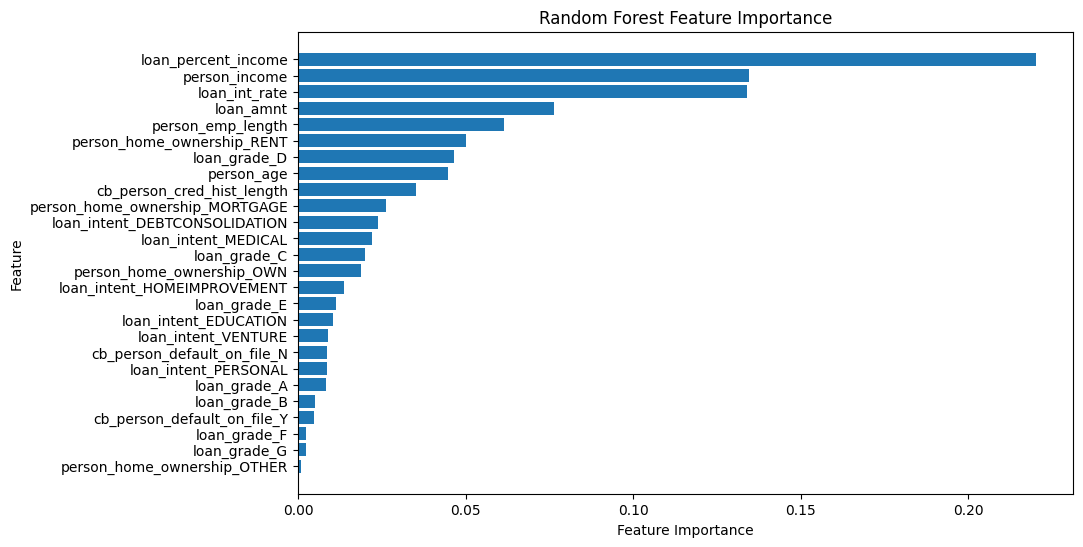

In [110]:
rforest_model = random_forest.fit(X_train,y_train)

# Get feature importances from the trained XGBoost model
feature_importances_rf = rforest_model.feature_importances_

# Get the names of the features
feature_names_rf = X_train.columns

# Create a DataFrame to store the feature names and their importances
feature_importance_df_rf = pd.DataFrame({'Feature': feature_names_rf, 'Importance': feature_importances_rf})

# Sort the features by importance in descending order
feature_importance_df_rf.sort_values(by='Importance', ascending=True,inplace=True)

# Create a horizontal bar plot to visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df_rf['Feature'], feature_importance_df_rf['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.show()

# Predict

In [116]:
# 1) Random Forest Classifier
random_forest_y_test_predict = cross_val_predict(rforest_model, X_test, y_test, cv=kfold)

print('RandomForestClassifier accuracy is %2.2f' % accuracy_score(y_test,random_forest_y_test_predict))

RandomForestClassifier accuracy is 0.92


In [ ]:
# 2) XG Boost
xgboost_y_test_predict = cross_val_predict(xgboost_model, X_test, y_test, cv=kfold)

print('XGBoost accuracy is %2.2f' % accuracy_score(y_test,xgboost_y_test_predict))

# Performance Analysis

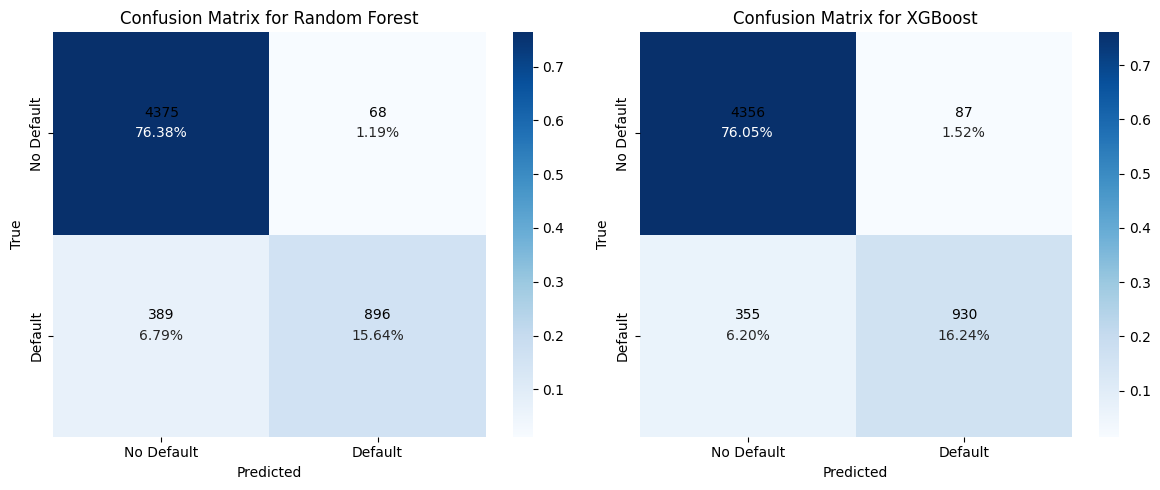

In [135]:
confusion_matrices = []

confusion_matrices.append(confusion_matrix(y_test, random_forest_y_test_predict))
confusion_matrices.append(confusion_matrix(y_test, xgboost_y_test_predict))

total_observations = len(y_test)
percentages = [confusion / total_observations for confusion in confusion_matrices]



# Plot confusion matrices in a heatmap
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
class_labels = ['No Default', 'Default']
model_names = ['Random Forest', 'XGBoost']


for i, ax in enumerate(axes):
    ax.set_title('Confusion Matrix for {}'.format(model_names[i]))
    sns.heatmap(percentages[i], annot=True, fmt='.2%', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels, ax=ax)
    for j in range(2):
        for k in range(2):
            ax.text(k + 0.5, j + 0.42, confusion_matrices[i][j, k], fontsize=10, color='black', ha='center')    
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')

plt.tight_layout()
plt.show()

# ROC

/Users/johannesschmidt/Credit-Risk-Model/Credit-Risk-Model/.conda/lib/python3.10/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


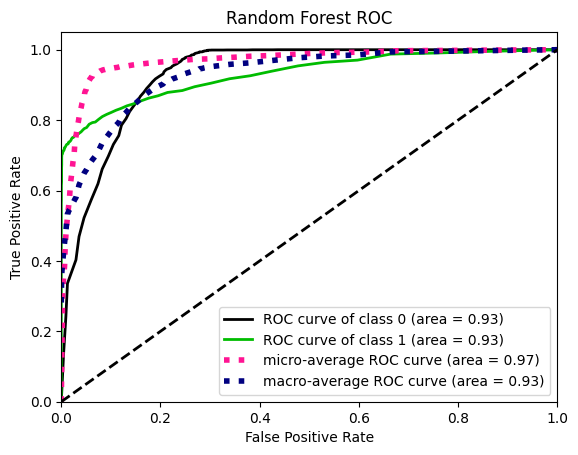

/Users/johannesschmidt/Credit-Risk-Model/Credit-Risk-Model/.conda/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/johannesschmidt/Credit-Risk-Model/Credit-Risk-Model/.conda/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/johannesschmidt/Credit-Risk-Model/Credit-Risk-Model/.conda/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/johannesschmidt/Credit-Risk-Model/Credit-Risk-Model/.conda/lib/python3.10/site-packages/xgboost/data.py:359: Fu

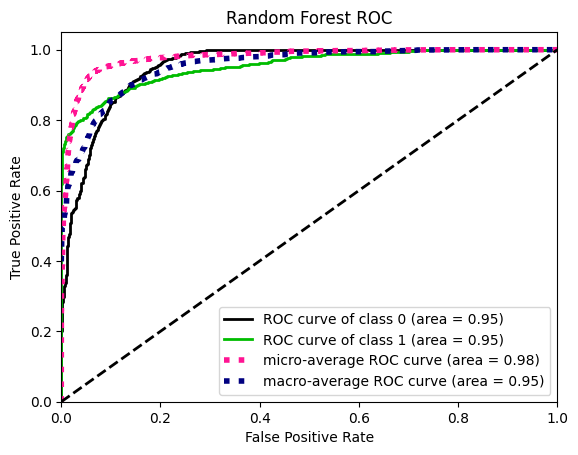

In [154]:
yhat_random_forest = rforest_model.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test,yhat_random_forest)
plt.title('Random Forest ROC')
plt.show()

yhat_xgboost = xgboost_model.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test,yhat_xgboost)
plt.title('Random Forest ROC')
plt.show()

Best Threshold = 0.270000, G-Mean=0.863


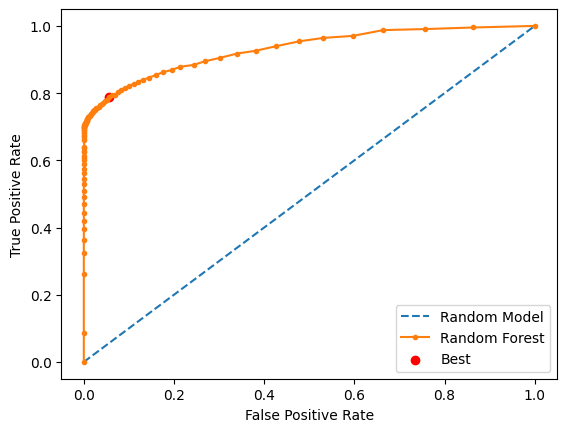

In [160]:
prob_yhat_random_forest = yhat_random_forest[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,prob_yhat_random_forest)

gmeans = np.sqrt(tpr * (1-fpr))
index = np.argmax(gmeans)
print('Best Threshold = %f, G-Mean=%.3f' % (thresholds[index],gmeans[index]))

plt.plot([0,1],[0,1],linestyle='--',label='Random Model')
plt.plot(fpr,tpr,marker ='.',label='Random Forest')
plt.scatter(fpr[index], tpr[index], marker='o', color='red', label='Best')

plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [164]:
# Obtain predicted class probabilities
y_test_probabilities = cross_val_predict(rforest_model, X_test, y_test, cv=kfold, method='predict_proba')

# Define your custom threshold (e.g., 0.26)
custom_threshold = 0.27

# Create an array of predicted labels based on the custom threshold
y_test_custom_predict = (y_test_probabilities[:, 1] >= custom_threshold).astype(int)

# Calculate accuracy using the custom threshold
custom_accuracy = accuracy_score(y_test, y_test_custom_predict)

print('Custom Threshold (0.27) Accuracy is {:.2f}'.format(custom_accuracy))

Custom Threshold (0.27) Accuracy is 0.88


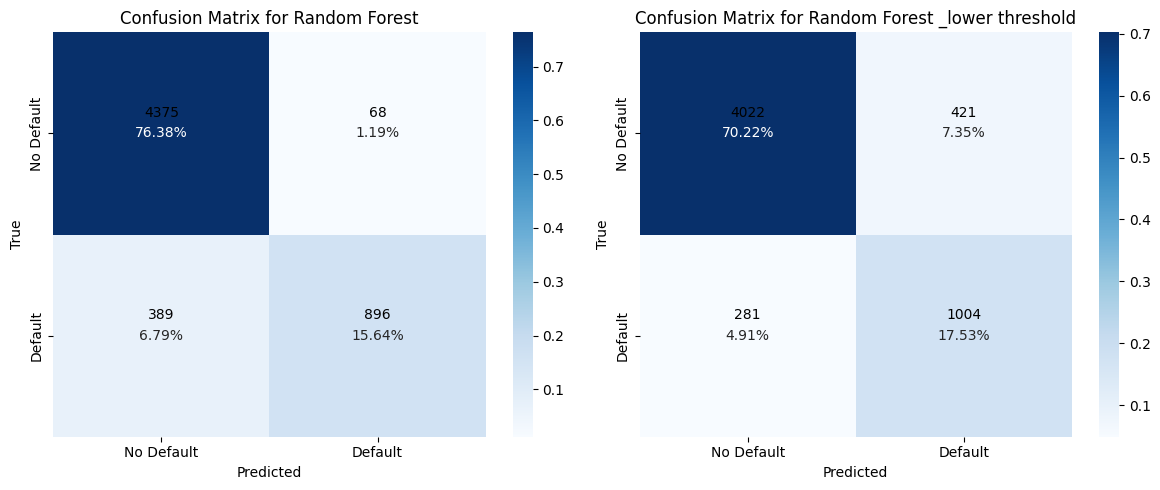

In [165]:
confusion_matrices = []

confusion_matrices.append(confusion_matrix(y_test, random_forest_y_test_predict))
confusion_matrices.append(confusion_matrix(y_test, y_test_custom_predict))

total_observations = len(y_test)
percentages = [confusion / total_observations for confusion in confusion_matrices]



# Plot confusion matrices in a heatmap
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
class_labels = ['No Default', 'Default']
model_names = ['Random Forest', 'Random Forest _lower threshold']


for i, ax in enumerate(axes):
    ax.set_title('Confusion Matrix for {}'.format(model_names[i]))
    sns.heatmap(percentages[i], annot=True, fmt='.2%', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels, ax=ax)
    for j in range(2):
        for k in range(2):
            ax.text(k + 0.5, j + 0.42, confusion_matrices[i][j, k], fontsize=10, color='black', ha='center')    
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')

plt.tight_layout()
plt.show()